# ***INF506 Methoden der Datenanalyse Projekt***

# ***Datenanalyse von Schlaganfallvorhersage***

**Autor: Mert Nasipoğlu - 180503012** 

## Vorverarbeitung

### Paket importieren

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

### Lesen von Daten

In [87]:
path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Die ersten 10 Daten des Datensatzes.

### Einige Informationen über Dataframe

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [89]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Einige Informationen über Dataframe


*   gender-, ever_married-, Residence_type-, smoking_status-Attribute sind Textattribute.
*   id, age, avg_glucose_level und bmi-Attribute sind Numerischattribute.

*   hypertension, heart_disease und stroke sind Binaryattribute.

*   Das bmi-Attribut hat 201 fehlende Werte.

### Entfernung von verlorene Daten

In [90]:
df = df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Wir entferne fehlende Reihe um die Daten richtig zu analysieren. 

### Ein letzte Überblick zum Daten nachdem der Entfernung

In [91]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [92]:
df.shape

(4909, 12)

## Hauptanalyse von Daten

### Allgemeine Analyse

In [93]:
sns.set_style(style= "darkgrid")
sns.set_context(context="notebook", font_scale=1.0)

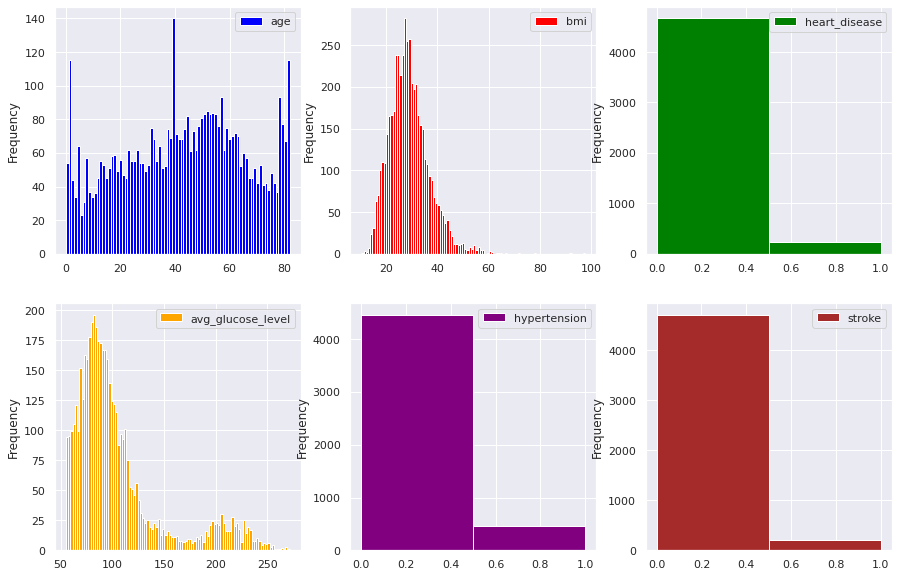

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
df.plot(kind="hist", y="age", bins=80, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=2, color="g", ax=axes[0][2])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][0])
df.plot(kind="hist", y="hypertension", bins=2, color="purple", ax=axes[1][1])
df.plot(kind="hist", y="stroke", bins=2, color="brown", ax=axes[1][2])
plt.show()

**Pairplot Matrix von Dataframe nach Schlaganfall**

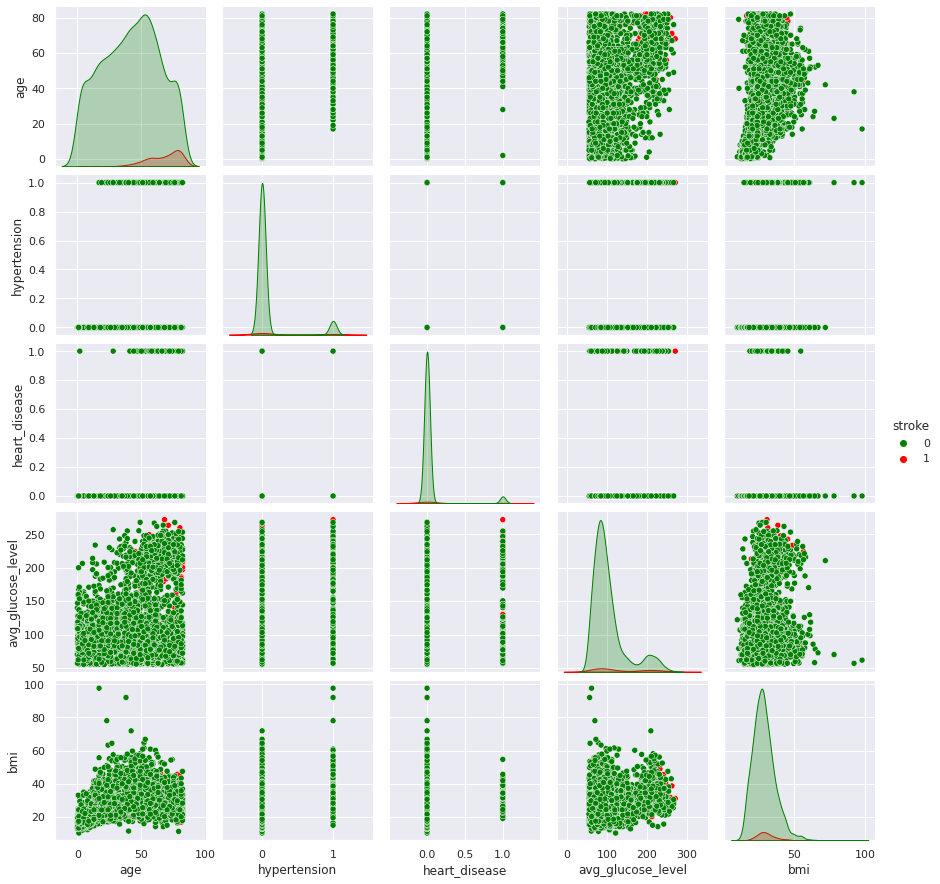

In [95]:
sns.pairplot(df.drop(columns='id',axis=1), hue = "stroke", plot_kws={'alpha':1.0}, palette = ['g','r'])

**Korrelation Heatmap von Dataframe**

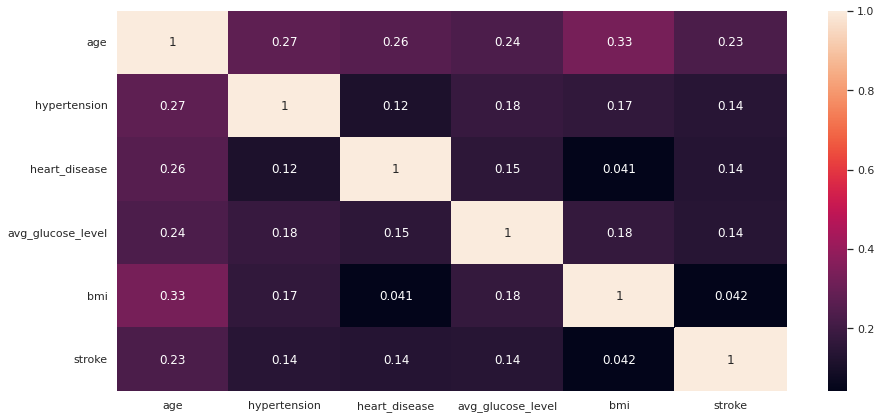

In [96]:
plt.figure(figsize=(15,7))
sns.heatmap(df[['gender', 'age',	'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'avg_glucose_level',	'bmi',	'smoking_status',	'stroke']].corr(),annot=True);

### Weitere Analyse

**Schlaganfall Wahrscheinlichkeit**

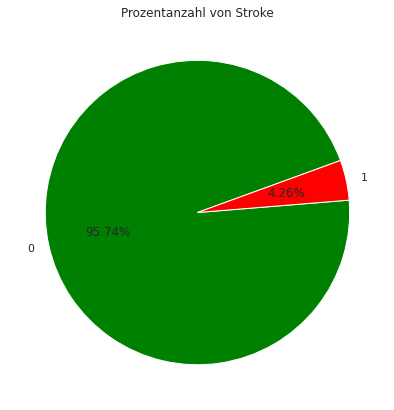

In [97]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Prozentanzahl von Stroke')
plt.show()



*   4.26% der Menschen haben einen Schlagenfall. 



**Daten nach Geschlecht**

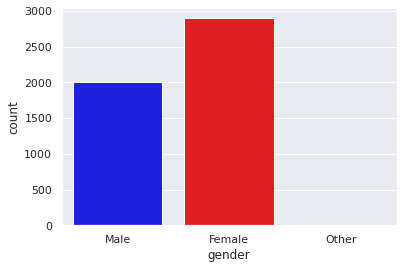

In [98]:
plt.figure()
sns.countplot(data=df,x='gender', palette=["b","r"]);

*   Es gibt ungefähr 1000 Unterschiede zwischen Frauen und Männern in den Daten.



**Daten nach Familienstand**

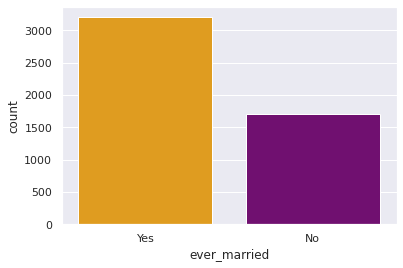

In [99]:
plt.figure()
sns.countplot(data=df,x='ever_married', palette=["orange","purple"]);

**Arbeittype der Testgruppe**

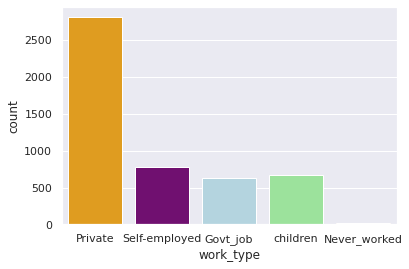

In [100]:
plt.figure()
sns.countplot(data=df,x='work_type', palette=["orange","purple","lightblue","lightgreen"]);

**Altersstatus von Testgruppe**

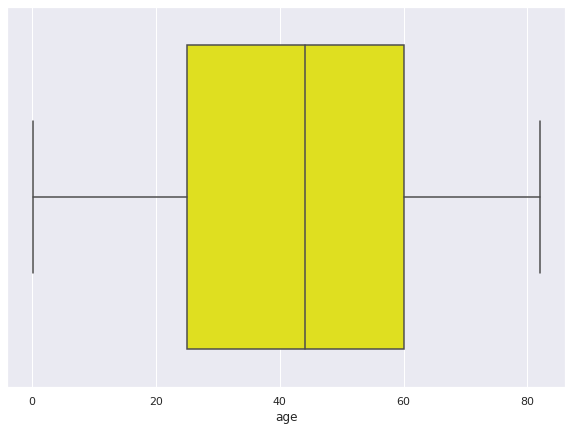

In [101]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["age"],color='yellow');



*   Age meist zwischen ca. 25 und 62 verteilt.


**Alterstatus der Menschen, die Schlaganfall haben**

In [102]:
stroked=df.loc[df['stroke']==1]
nicht_stroked=df.loc[df['stroke']==0]

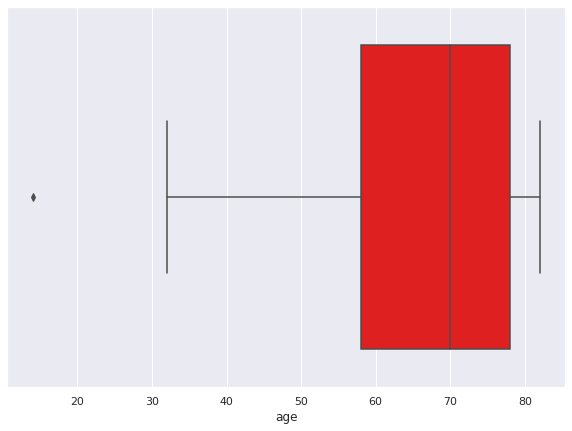

In [103]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=stroked["age"],color='r');

In [104]:
stroked.age.min()

14.0



*   Das zeigt uns, dass die durchnittliche Alt von Schlaganfallüberlebender ist ersichtlich hoch.
*   Dagegen ist das Alter  für uns jedoch kein absolutes Kriterium, da der jüngste Patient 14 Jahre alt ist.



**Raucherstatus von Schlaganfallüberlebenden**

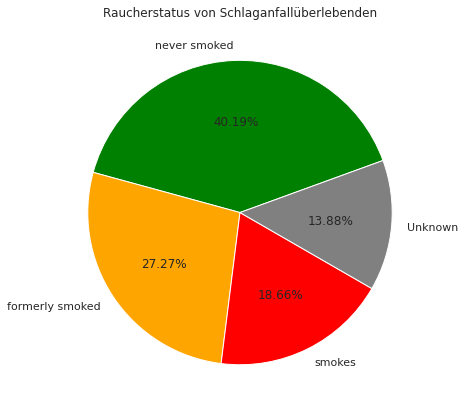

In [105]:
labels =stroked['smoking_status'].value_counts(sort = True).index
sizes = stroked['smoking_status'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","orange","red","grey"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Raucherstatus von Schlaganfallüberlebenden')
plt.show()

 *   Nachdem die Unbekannten verteilt wurden, ist die Zahl der "Nie-Raucher" und "Ex-Raucher"+"Raucher" fast gleich.

**Aufenthaltsstatus**

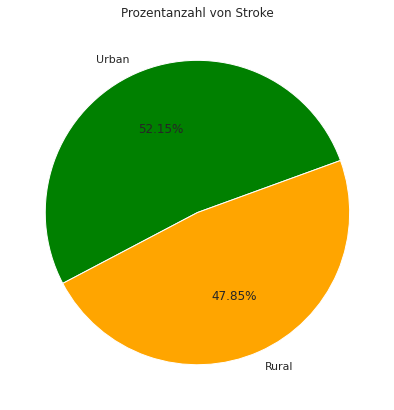

In [106]:
labels =stroked['Residence_type'].value_counts(sort = True).index
sizes = stroked['Residence_type'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","orange"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Prozentanzahl von Stroke')
plt.show()

*   Es gibt nur ein kleines Unterschied zwischen städtischen und ländlichen Wohnformen. Es kann gesagt werden, dass es keinen großen Einfluss auf den Schlaganfall hat.

**Schlaganfallrisiko von Herzerkrankungpatienten**

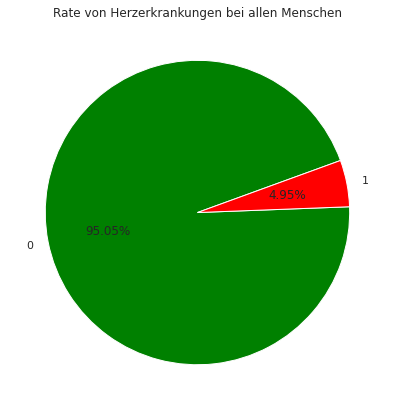

In [107]:
labels =df['heart_disease'].value_counts(sort = True).index
sizes = df['heart_disease'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Herzerkrankungen bei allen Menschen')
plt.show()

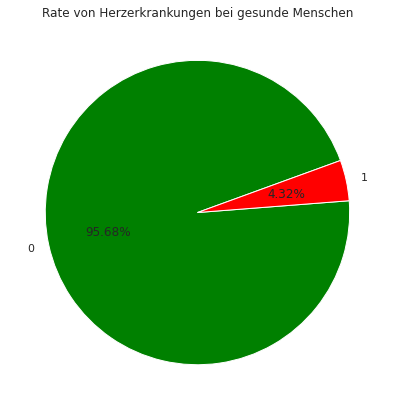

In [108]:
labels = nicht_stroked['heart_disease'].value_counts(sort = True).index
sizes = nicht_stroked['heart_disease'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Herzerkrankungen bei gesunde Menschen')
plt.show()

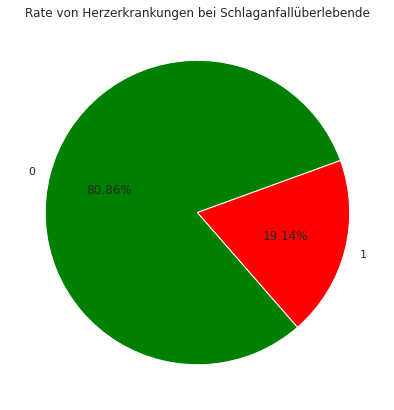

In [109]:
labels =stroked['heart_disease'].value_counts(sort = True).index
sizes = stroked['heart_disease'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Herzerkrankungen bei Schlaganfallüberlebende')
plt.show()



*   Hier können wir sehen, dass die Herzerkrankungrate bei Schlaganfallüberlebende ist eindeutig höher als gesunde Menschen.



*   Das zeigt uns, Herzerkrankungen haben einen signifikanten Einfluss auf den Schlaganfall.



**Schlaganfallrisiko von Hypertoniepatienten**

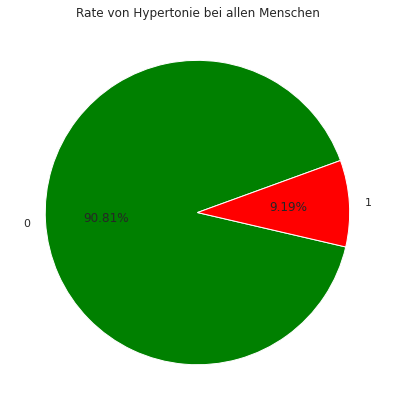

In [110]:
labels =df['hypertension'].value_counts(sort = True).index
sizes = df['hypertension'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Hypertonie bei allen Menschen')
plt.show()

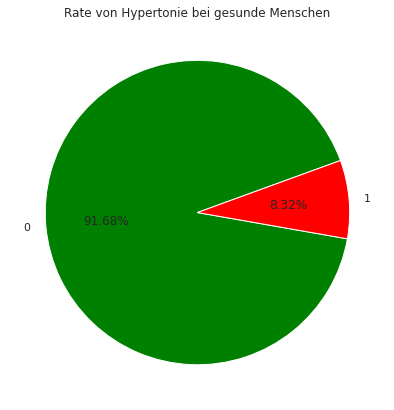

In [111]:
labels = nicht_stroked['hypertension'].value_counts(sort = True).index
sizes = nicht_stroked['hypertension'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Hypertonie bei gesunde Menschen')
plt.show()

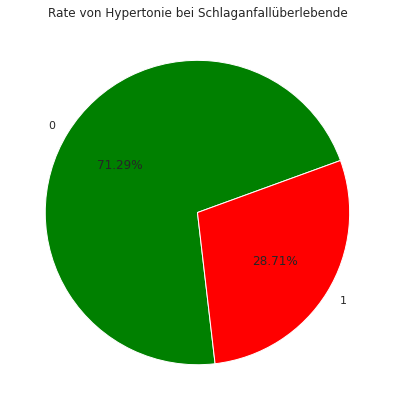

In [112]:
labels =stroked['hypertension'].value_counts(sort = True).index
sizes = stroked['hypertension'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Hypertonie bei Schlaganfallüberlebende')
plt.show()

*   Hier können wir sehen, dass die Hypertonie bei Schlaganfallüberlebende ist eindeutig höher als gesunde Menschen.



*   Das zeigt uns, Hypertonie haben einen signifikanten Einfluss auf den Schlaganfall.

**Schlaganfallraten nach Textattributen**

In [113]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
stroke_or_not = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
stroke_or_not["percent"] = (stroke_or_not[1]/stroke_or_not[0])*100
stroke_or_not

stroke                             0    1   percent
gender         Female           2777  120  4.321210
               Male             1922   89  4.630593
               Other               1    0  0.000000
Residence_type Rural            2319  100  4.312204
               Urban            2381  109  4.577908
smoking_status Unknown          1454   29  1.994498
               formerly smoked   780   57  7.307692
               never smoked     1768   84  4.751131
               smokes            698   39  5.587393

**Schlaganfallraten nach Glukosespiegel**

In [114]:
glukose_outlier2 = df.loc[df["avg_glucose_level"]>126]
glukose_outlier1 = df.loc[df["avg_glucose_level"]<=70]
glukose_outlier = glukose_outlier2.append(glukose_outlier1, ignore_index=True)
glukose_outlier

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
2,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
3,56669,Male,81.00,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
4,5317,Female,79.00,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1650,38349,Female,49.00,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0
1651,60271,Male,78.00,0,0,Yes,Private,Urban,60.22,29.7,formerly smoked,0
1652,62425,Female,5.00,0,0,No,children,Urban,61.98,16.8,Unknown,0
1653,71957,Female,35.00,0,0,Yes,Private,Rural,58.72,40.0,smokes,0




*   Erstellen Sie einen neuen Datenrahmen, der Ausreißer des durchschnittlichen Glukosespiegels enthält.



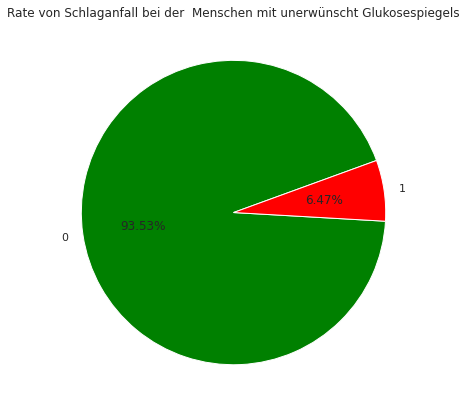

In [115]:
labels =glukose_outlier['stroke'].value_counts(sort = True).index
sizes = glukose_outlier['stroke'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Schlaganfall bei der  Menschen mit unerwünscht Glukosespiegels')
plt.show()

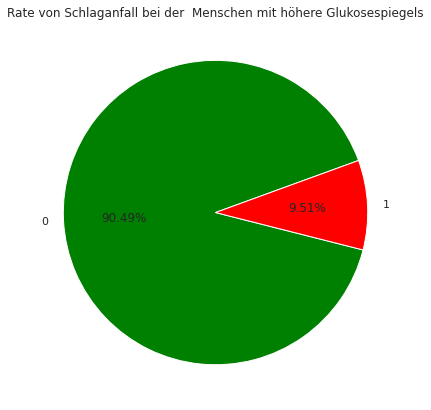

In [116]:
labels =glukose_outlier2['stroke'].value_counts(sort = True).index
sizes = glukose_outlier2['stroke'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Schlaganfall bei der  Menschen mit höhere Glukosespiegels')
plt.show()

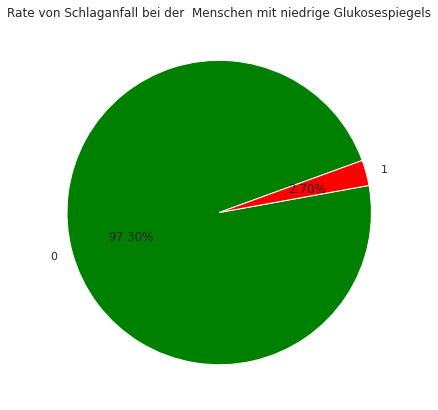

In [117]:
labels =glukose_outlier1['stroke'].value_counts(sort = True).index
sizes = glukose_outlier1['stroke'].value_counts(sort = True)
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels,colors=["g","r"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Schlaganfall bei der  Menschen mit niedrige Glukosespiegels')
plt.show()



*   Laut der Analyse hat hohere Glukosespiegels ein schlechte Einfluss über Schlaganfallrisiko dagegen hat niedrige Glukosespiegels ein gutes Einfluss.
*   So hat Glukosespiegel ein wichtige Rolle für Schlaganfall.



**Schalganfallrisiko nach Gesclecht**

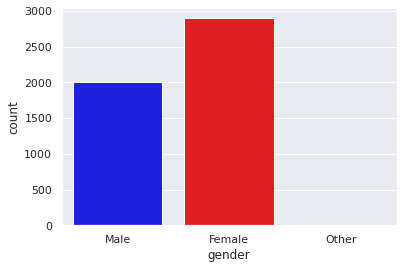

In [118]:
plt.figure()
sns.countplot(data=df,x='gender', palette=["b","r"]);

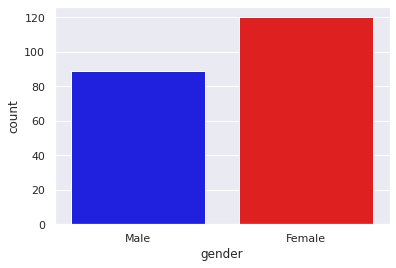

In [119]:
plt.figure()
sns.countplot(data=stroked,x='gender', palette=["b","r"]);



*   In der beiden Grafiken sind die Frauen circa 50% mehr als Frauen.
*   So habt der Geschlecht kein Einfluss über Schlaganfall.



**Schalganfallrisiko nach dem Alter**

In [120]:
alter = stroked.loc[stroked["age"]>40]
junger = stroked.loc[stroked["age"]<=40]

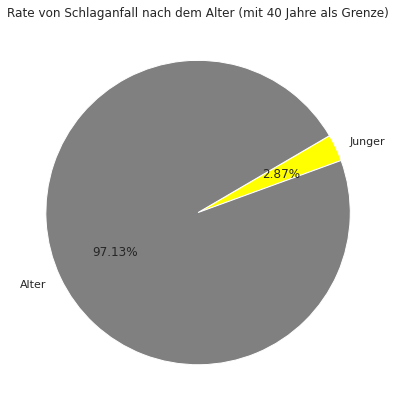

In [121]:
plt.figure(figsize=(7,7))
plt.pie([junger.size,alter.size], labels=["Junger","Alter"],colors=["yellow","grey"], autopct='%1.2f%%', shadow=False, startangle=20,)

plt.title('Rate von Schlaganfall nach dem Alter (mit 40 Jahre als Grenze)')
plt.show()



*   97% von Schlaganfallüberlebende sind alte Menschen.

*   So sehen wir ,dass der Alter hat die gröseste Einfluss über Schlaganfall.

